In [19]:
import pyodbc
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

conn=pyodbc.connect('Driver={SQL Server};'
                    'Server=localhost;'
                    'Database=MentalHealthDB;'
                    'Trusted_Connection=yes;')

query="SELECT * FROM MentalHealthDataset"
df=pd.read_sql(query, conn)
print(df)

     User_ID   Age             Gender  Occupation    Country  \
0        1.0  36.0         Non-binary       Sales     Canada   
1        2.0  34.0             Female   Education         UK   
2        3.0  65.0         Non-binary       Sales        USA   
3        4.0  34.0               Male       Other  Australia   
4        5.0  22.0             Female  Healthcare     Canada   
..       ...   ...                ...         ...        ...   
995    996.0  46.0         Non-binary       Other    Germany   
996    997.0  31.0               Male       Sales     Canada   
997    998.0  33.0             Female          IT    Germany   
998    999.0  42.0             Female     Finance  Australia   
999   1000.0  43.0  Prefer not to say       Sales    Germany   

    Mental_Health_Condition Severity Consultation_History Stress_Level  \
0                        No   Medium                  Yes       Medium   
1                       Yes     None                   No          Low   
2        

C:\Users\jeffg\AppData\Local\Temp\ipykernel_48796\3436331956.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query, conn)



Shape:
(1000, 13)

Columns:
Index(['User_ID', 'Age', 'Gender', 'Occupation', 'Country',
       'Mental_Health_Condition', 'Severity', 'Consultation_History',
       'Stress_Level', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours',
       'MentalHealthCondition'],
      dtype='object')

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   float64
 1   Age                      1000 non-null   float64
 2   Gender                   1000 non-null   object 
 3   Occupation               1000 non-null   object 
 4   Country                  1000 non-null   object 
 5   Mental_Health_Condition  1000 non-null   object 
 6   Severity                 1000 non-null   object 
 7   Consultation_History     1000 non-null   object 
 8   Stress_Level             1000 non-null   object 


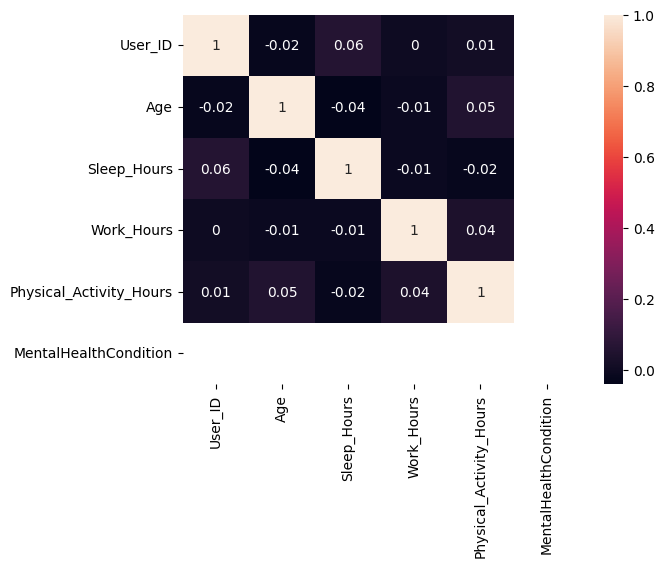

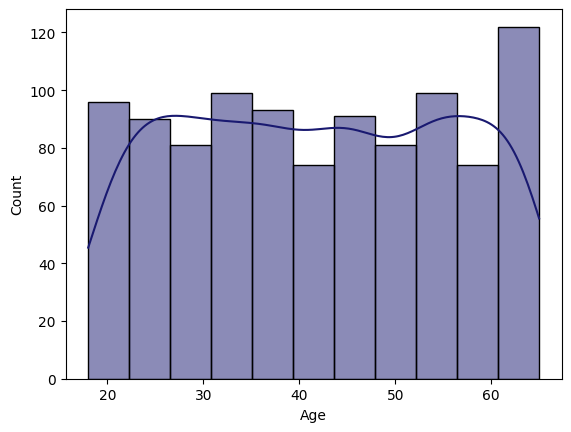

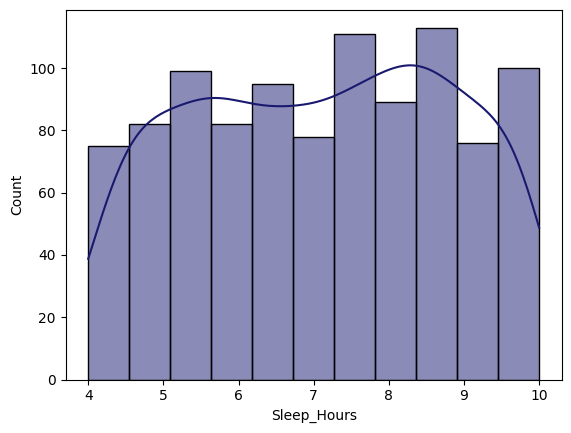

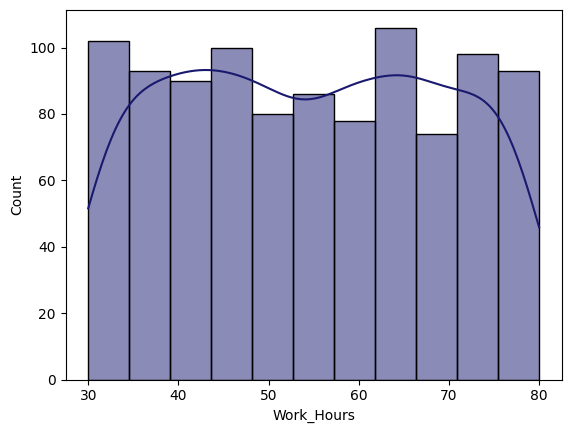

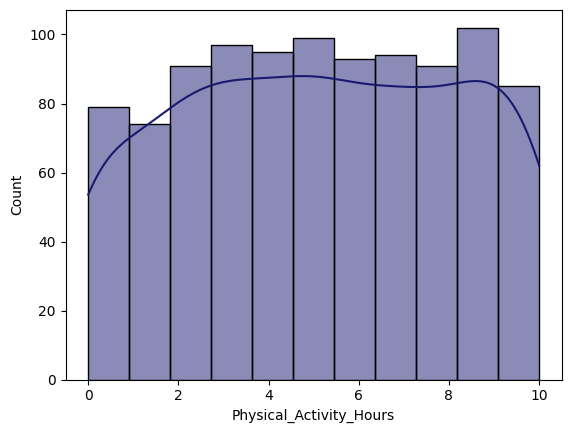

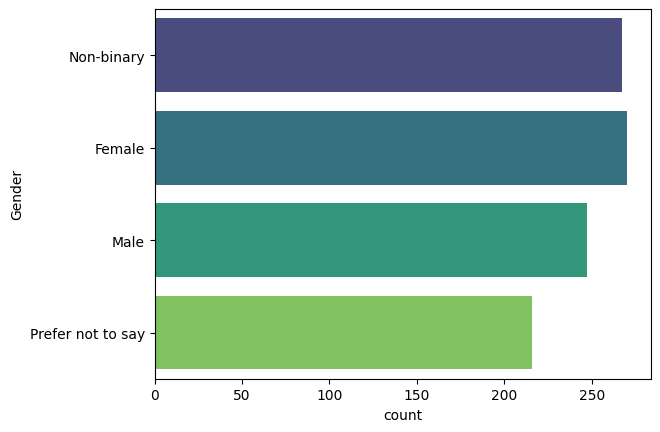

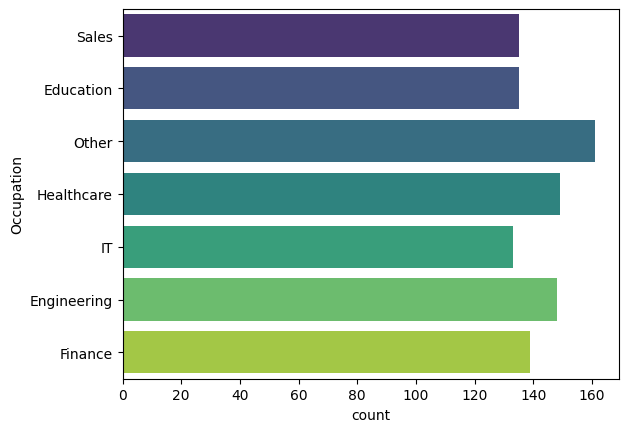

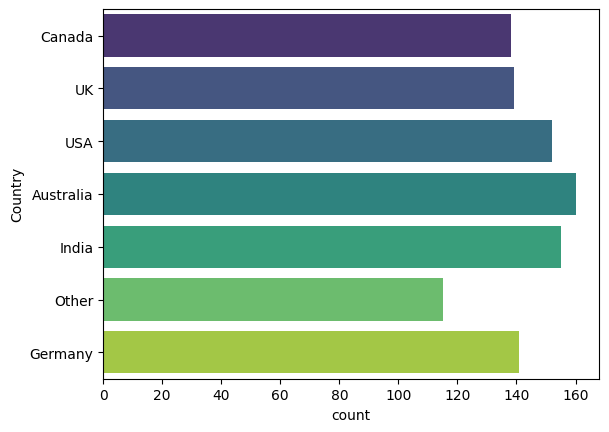

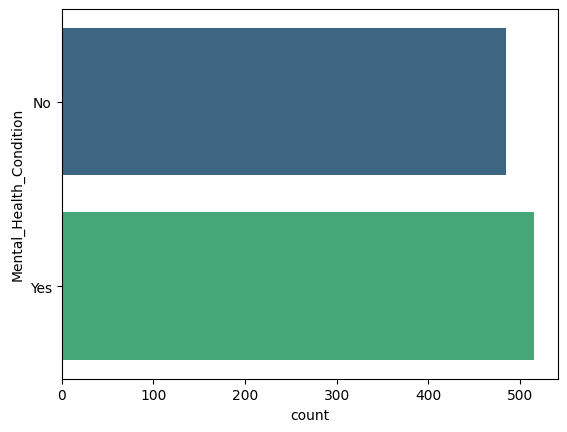

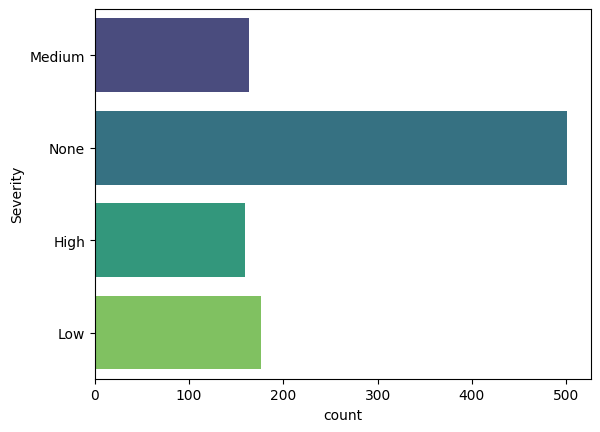

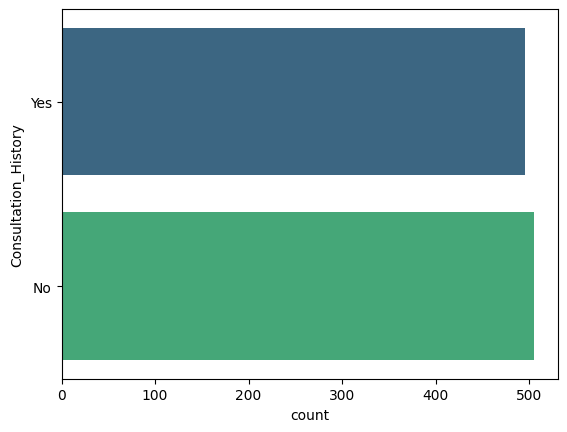

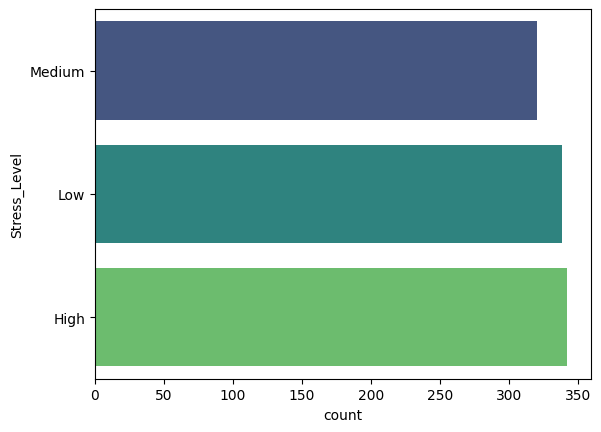

In [26]:

#X=df[['Age', 'Gender', 'Occupation',
#      'Country', 'Mental_Health_Condition', 'Severity', 'Consultation_History', 'Stress_Level']]
#Y=df['Work_Hours']
numeric=df[['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours']]
categoric=df[['Gender', 'Occupation', 'Country', 'Mental_Health_Condition', 'Severity', 'Consultation_History', 'Stress_Level']]

print("\nShape:")
print(df.shape)
print("\nColumns:")
print(df.columns)
print("\ninfo:")
print(df.info())
print("\nStatistical Description:")
print(df.describe())

print("\n")

# Unique values for non-numeric columns
for i in range(df.shape[1]):
      column=df.columns[i]
      if pd.api.types.is_object_dtype(df[column]):
            print(f'{df[column].value_counts()}\n')

#Correlation matrix for numeric columns
corr_matrix=df.corr(numeric_only=True).round(2)
sns.heatmap(data=corr_matrix, annot=True)
plt.show()

#Distribution of numeric columns
for i in numeric:
      sns.histplot(df, x=i, kde=True, color="midnightblue")
      plt.show()

#Distribution of categoric columns
for j in categoric:
    sns.countplot(df, y=j, hue=j, palette="viridis")
    plt.show()

In [27]:
"""
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

#Preprocessing Steps
#Handling categorical values
label_encoders={}
for i in categoric:
    label_encoders[i]=LabelEncoder()
    df[i]=label_encoders[i].fit_transform(df[i].astype(str))

#Impute missing values
imputer=SimpleImputer(strategy='mean')
df_imputed=pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

#Normalize numerical features
numerical_columns=['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours']
scaler=StandardScaler()
df_imputed[numerical_columns]=scaler.fit_transform(df_imputed[numerical_columns])

print(df.head())
df_imputed.to_csv('preprocessed_mental_health_dataset,csv', index=False)
"""

"\nfrom sklearn.preprocessing import LabelEncoder, StandardScaler\nfrom sklearn.impute import SimpleImputer\n\n#Preprocessing Steps\n#Handling categorical values\nlabel_encoders={}\nfor i in categoric:\n    label_encoders[i]=LabelEncoder()\n    df[i]=label_encoders[i].fit_transform(df[i].astype(str))\n\n#Impute missing values\nimputer=SimpleImputer(strategy='mean')\ndf_imputed=pd.DataFrame(imputer.fit_transform(df), columns=df.columns)\n\n#Normalize numerical features\nnumerical_columns=['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours']\nscaler=StandardScaler()\ndf_imputed[numerical_columns]=scaler.fit_transform(df_imputed[numerical_columns])\n\nprint(df.head())\ndf_imputed.to_csv('preprocessed_mental_health_dataset,csv', index=False)\n"

In [28]:
df['MentalHealthCondition']=(df['Mental_Health_Condition']=="Yes").astype(int)
print(df['MentalHealthCondition'])

0      0
1      1
2      1
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: MentalHealthCondition, Length: 1000, dtype: int32


In [29]:
from sklearn.model_selection import train_test_split
x=df.drop(['Mental_Health_Condition', 'MentalHealthCondition'], axis=1)
y=df['MentalHealthCondition']

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 11)
(200, 11)
(800,)
(200,)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Logistic Regression
lr_model=LogisticRegression(random_state=5)
lr_model.fit(x_train, y_train)
lr_pred=lr_model.predict(x_test)

# Decision Tree
dt_model=DecisionTreeClassifier(random_state=5)
dt_model.fit(x_train, y_train)
dt_pred=dt_model.predict(x_test)

#Perform cross-validation on LR
lr_scores=cross_val_score(lr_model, x_train, y_train, scoring='accuracy', cv=10)
#Perform cross-validation on DT
dt_scores=cross_val_score(dt_model, x_train, y_train, scoring='accuracy', cv=10)

#Cross validation results
print("LR 10-fold cross validation result:")
print("----------------------------")
print("Accuracy is {}".format((lr_scores))+"\n")
print("Average Accuracy is {}".format(np.mean(lr_scores))+"\n")

print("DT 10-fold cross validation result:")
print("----------------------------")
print("Accuracy is {}".format((dt_scores))+"\n")
print("Average Accuracy is {}".format(np.mean(dt_scores))+"\n")

ValueError: could not convert string to float: 'Male'